# Create a wordcloud from the cleaned article text

In [11]:
from wordcloud import WordCloud
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from IPython.display import Image
data = pd.read_csv('articleCleanedText.csv', sep=',', encoding='utf-8')
%matplotlib inline

## The goal is to create something like this

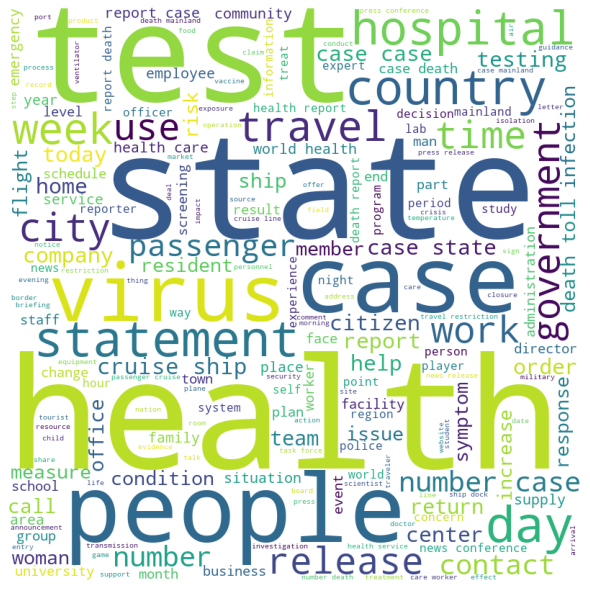

In [25]:
Image('articleWordCloud.png', width=400, height=400)
# Or exactly this, because this is the wordcloud from the dataset 

In [9]:
data.head()

,Unnamed: 0,ArticleText,PublishDate,CleanedArticleText
0,0,Our live coverage of the coronavirus outbreak ...,2020-02-01,"['end', 'today', 'people', 'mainland', 'end', ..."
1,1,Please click here to read more live updates on...,2020-02-02,"['update', 'field', 'departure', 'assistance',..."
2,2,Our live coverage of the Wuhan coronavirus out...,2020-02-03,"['hospital', 'statement', 'isolation', 'home',..."
3,3,Our live coverage of the coronavirus outbreak ...,2020-02-04,"['health', 'people', 'death', 'toll', 'people'..."
4,4,Our live coverage of the coronavirus outbreak ...,2020-02-05,"['number', 'case', 'increase', 'end', 'day', '..."


In [3]:
cleanlist = []
fullWordList = []

In [4]:
nlp = spacy.load('en')
wordCloudString = ''

In [5]:
# use this if you need to save on processing power
# for i in range(len(40))
for i in range(len(data)):
    dataAfterLemmaFilter = []
    cleanArticleVar = data.loc[i, "CleanedArticleText"]
    doc = nlp(cleanArticleVar)
    # I mentioned this in the last notebook, I stored this as a list because I originally thought it would be 
    # easier to reuse in the future, I was wrong, so this is how I fixed storing it as a list
    if cleanArticleVar != '':
        for token in doc:
            dataAfterLemmaFilter.append(token.lemma_)

        removelist = ['[', ']', '\'', ',']

        for item in dataAfterLemmaFilter:
            if item not in removelist:
                cleanlist.append(item)


In [6]:
for word in cleanlist:
    wordCloudString = wordCloudString + ' ' + word

In [7]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(wordCloudString)

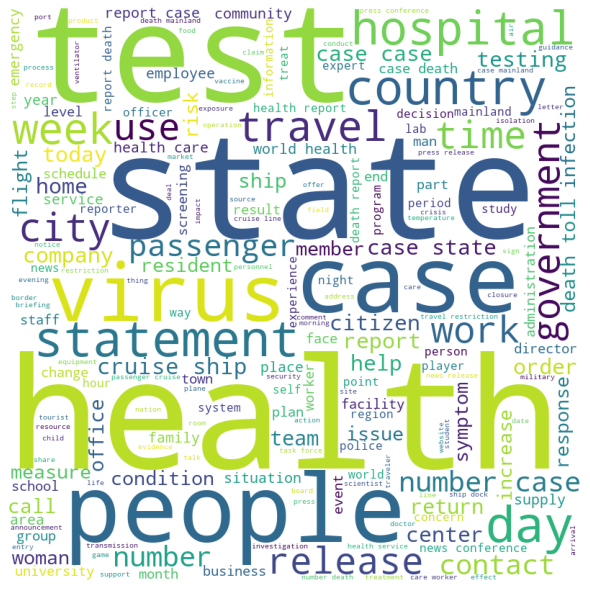

In [8]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
